In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
#mouse file has 250 rows of data
mouse_df = pd.read_csv(mouse_drug_data_to_load)

#clinical file has 1893 rows of data
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_clinical_df = pd.merge(mouse_df, clinical_df, on='Mouse ID')

# Display the data table for preview

In [2]:
mouse_clinical_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [3]:
#mean_tumor_df = mouse_clinical_df.groupby('Drug','Timepoint')['Tumor Volume (mm3)'].mean().to_frame().reset_index()
mean_tumor_df = mouse_clinical_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean().reset_index()
mean_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [8]:
mean_tumor_se_df = mouse_clinical_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem().reset_index()
mean_tumor_se_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
mean_tumor_df.set_index("Timepoint")
mean_tumor_df2 = mean_tumor_df.T
mean_tumor_df2.head()
#JGP or maybe create new data frame from  

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Drug,Capomulin,Capomulin,Capomulin,Capomulin,Capomulin,Capomulin,Capomulin,Capomulin,Capomulin,Capomulin,...,Zoniferol,Zoniferol,Zoniferol,Zoniferol,Zoniferol,Zoniferol,Zoniferol,Zoniferol,Zoniferol,Zoniferol
Timepoint,0,5,10,15,20,25,30,35,40,45,...,0,5,10,15,20,25,30,35,40,45
Tumor Volume (mm3),45,44.2661,43.0843,42.0643,40.7163,39.9395,38.7693,37.8168,36.958,36.2361,...,45,46.8518,48.6899,50.7791,53.1703,55.4329,57.7135,60.0894,62.9167,65.9609


In [8]:
mouse_clinical_df.count()

Mouse ID              1906
Drug                  1906
Timepoint             1906
Tumor Volume (mm3)    1906
Metastatic Sites      1906
dtype: int64

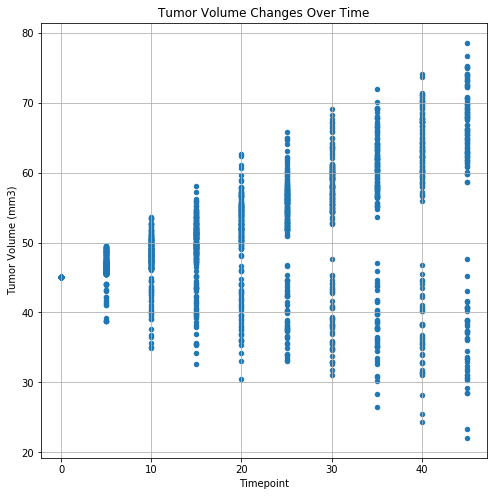

In [9]:
mouse_clinical_df.plot(kind="scatter", x="Timepoint", y="Tumor Volume (mm3)", grid=True, figsize=(8,8), title="Tumor Volume Changes Over Time")

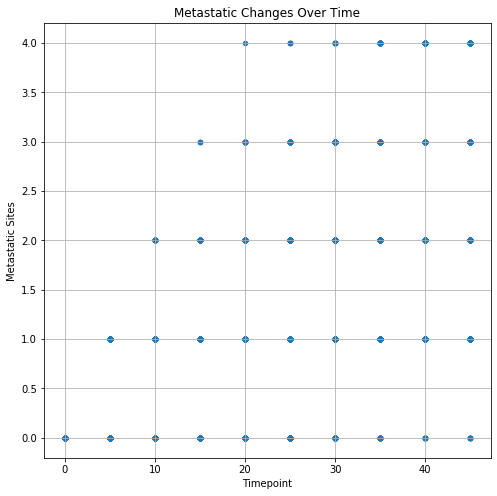

In [10]:
mouse_clinical_df.plot(kind="scatter", x="Timepoint", y="Metastatic Sites", grid=True, figsize=(8,8), title="Metastatic Changes Over Time")